In [1]:
# This program attempts to fit a DNN to the MNIST dataset with random target labels
# Results show this does not work well

import tensorflow as tf
import numpy as np
import torch
import torchvision as tv
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
# Grab MNIST Dataset
trainingSet = datasets.MNIST('', train=True, download=False, transform=transforms.Compose([transforms.ToTensor()]))
testingSet = datasets.MNIST('', train=False, download=False, transform=transforms.Compose([transforms.ToTensor()]))

In [3]:
# Randomly shuffle labels
randomLabelsTrain = torch.tensor(np.random.randint(0,10, (len(trainingSet)),))
trainingSet.targets = randomLabelsTrain
randomLabelsTest = torch.tensor(np.random.randint(0,10, (len(testingSet)),))
testingSet.targets = randomLabelsTest

# Prep data for training and testing
train = torch.utils.data.DataLoader(trainingSet, batch_size=50, shuffle=True)
test = torch.utils.data.DataLoader(testingSet, batch_size=50, shuffle=True)


In [4]:
# Random Labels NN for training - 2 hidden layers, 8175 parameters
class randomNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 10)
        self.fc2 = nn.Linear(10, 15)
        self.fc3 = nn.Linear(15, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

In [5]:
# Set up necessary auxilaries for neural net training
randomNet = randomNN()
costFunc = nn.CrossEntropyLoss()
opt = optim.Adam(randomNet.parameters(), lr=0.001)

In [6]:
# Train Random Label neural networks, Calculate accuracy for training and testing in each epoch
EPOCHS = 400
counter = 0
counterList = []
costList = []
testLossList = []
trainLossList = []
for index in range(EPOCHS):
    counterList.append(counter)
    counter += 1
    # Train model
    for batch in train:
        inputImages, groundTruth = batch
        randomNet.zero_grad()
        output = randomNet(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        cost.backward()
        opt.step()
    costList.append(cost)
    
    # Calculate cost on training data
    trainTotal = 0
    trainCounter = 0
    for batch in train: 
        inputImages, groundTruth = batch
        output = randomNet(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        trainTotal += cost
        trainCounter += 1
    trainTotal = trainTotal / trainCounter
    trainLossList.append(trainTotal)
    
    # Calculate cost on test data
    testTotal = 0
    testCounter = 0
    for batch in test: 
        inputImages, groundTruth = batch
        output = randomNet(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        testTotal += cost
        testCounter += 1
    testTotal = testTotal / testCounter
    testLossList.append(testTotal)

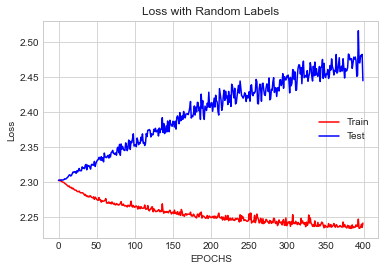

In [7]:
# Visulaize Accuracy of nn for for MNIST dataset
plt.plot(counterList, trainLossList, 'r', label='Train')
plt.plot(counterList, testLossList, 'b', label='Test')
plt.title("Loss with Random Labels")
plt.xlabel("EPOCHS")
plt.ylabel("Loss")
plt.legend(loc="center right")
plt.show()